## Problem Statement

#### To predict the Sale price of houses based on their various features such as location, number of bedrooms and bathrooms, square footage, lot size, and other relevant factors.

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer #importing necessary libraries 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('HPtrain.csv') # reading the data

### EDA

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1459, 81)

In [5]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
df.isnull().sum().sum()

6960

In [7]:
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0]) # only showing columns which have null values

LotFrontage      259
Alley           1368
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      689
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1452
Fence           1178
MiscFeature     1405
dtype: int64


In [8]:
df.describe() # we can find outliers here itself by checking difference between median and mean

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1459.000000,1459.000000,1200.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1451.00000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,730.000000,56.922550,70.045833,10517.225497,6.100069,5.575051,1971.272104,1984.879369,103.75672,443.374914,...,93.804661,46.645648,21.969157,3.411926,15.071282,2.760795,43.518849,6.322138,2007.815627,180944.102810
std,421.321334,42.304033,24.294456,9984.675721,1.383171,1.113125,30.212814,20.645927,181.10815,456.142186,...,124.249421,66.276387,61.137400,29.327247,55.775138,40.191018,496.291826,2.704540,1.328542,79464.918335
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.500000,20.000000,59.000000,7549.000000,5.000000,5.000000,1954.000000,1967.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129950.000000
50%,730.000000,50.000000,69.000000,9477.000000,6.000000,5.000000,1973.000000,1994.000000,0.00000,383.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1094.500000,70.000000,80.000000,11603.000000,7.000000,6.000000,2000.000000,2004.000000,166.00000,712.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1459.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.00000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1200 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [10]:
important_num_cols = list(df.corr()["SalePrice"][(df.corr()["SalePrice"]>0.50)].index)
important_num_cols

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

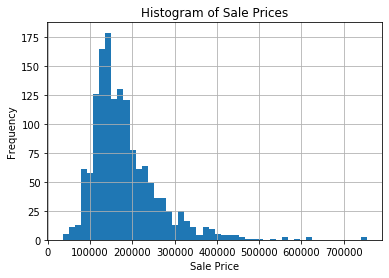

In [11]:
df['SalePrice'].hist(bins=50)
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Histogram of Sale Prices')
plt.show() 
# Frequency - count of observations in each bin.
# This will help you identify if the target variable is normally distributed or if it has any outliers.

In [12]:
df = df.drop(['Id','Alley','PoolQC','MiscFeature','Fence','GarageFinish','GarageFinish','Utilities','Condition1','Condition2','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtUnfSF','KitchenQual','KitchenQual','YrSold','SaleType'],axis = 1) 
# Dropping unnecessary columns along with columns having more than 80% null values

In [13]:
df.shape

(1459, 65)

In [14]:
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0]) # counting number of null values in each column

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtExposure     38
Electrical        1
FireplaceQu     689
GarageType       81
GarageYrBlt      81
GarageQual       81
GarageCond       81
dtype: int64


In [15]:
num=df._get_numeric_data() 
num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,250000


In [16]:
imputer = SimpleImputer(strategy='median')
imputed_data = imputer.fit_transform(num)

In [17]:
num_cols=pd.DataFrame((imputed_data),columns=num.columns)
num_cols.isnull().sum().sum()

0

In [18]:
cat=df.drop(num,axis=1)
cat=cat.astype('category')
cat.head() # Taking numerical columns and categorical columns

,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,RoofStyle,...,HeatingQC,CentralAir,Electrical,Functional,FireplaceQu,GarageType,GarageQual,GarageCond,PavedDrive,SaleCondition
0,RL,Pave,Reg,Lvl,Inside,Gtl,CollgCr,1Fam,2Story,Gable,...,Ex,Y,SBrkr,Typ,NaN,Attchd,TA,TA,Y,Normal
1,RL,Pave,Reg,Lvl,FR2,Gtl,Veenker,1Fam,1Story,Gable,...,Ex,Y,SBrkr,Typ,TA,Attchd,TA,TA,Y,Normal
2,RL,Pave,IR1,Lvl,Inside,Gtl,CollgCr,1Fam,2Story,Gable,...,Ex,Y,SBrkr,Typ,TA,Attchd,TA,TA,Y,Normal
3,RL,Pave,IR1,Lvl,Corner,Gtl,Crawfor,1Fam,2Story,Gable,...,Gd,Y,SBrkr,Typ,Gd,Detchd,TA,TA,Y,Abnorml
4,RL,Pave,IR1,Lvl,FR2,Gtl,NoRidge,1Fam,2Story,Gable,...,Ex,Y,SBrkr,Typ,TA,Attchd,TA,TA,Y,Normal


In [19]:
imputer1 = SimpleImputer(strategy='most_frequent')
imputed_data1 = imputer1.fit_transform(cat)
# used simple imputer to fill null values by mode strategy

In [20]:
cat_data=pd.DataFrame((imputed_data1),columns=cat.columns)
cat_data.head()

,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,RoofStyle,...,HeatingQC,CentralAir,Electrical,Functional,FireplaceQu,GarageType,GarageQual,GarageCond,PavedDrive,SaleCondition
0,RL,Pave,Reg,Lvl,Inside,Gtl,CollgCr,1Fam,2Story,Gable,...,Ex,Y,SBrkr,Typ,Gd,Attchd,TA,TA,Y,Normal
1,RL,Pave,Reg,Lvl,FR2,Gtl,Veenker,1Fam,1Story,Gable,...,Ex,Y,SBrkr,Typ,TA,Attchd,TA,TA,Y,Normal
2,RL,Pave,IR1,Lvl,Inside,Gtl,CollgCr,1Fam,2Story,Gable,...,Ex,Y,SBrkr,Typ,TA,Attchd,TA,TA,Y,Normal
3,RL,Pave,IR1,Lvl,Corner,Gtl,Crawfor,1Fam,2Story,Gable,...,Gd,Y,SBrkr,Typ,Gd,Detchd,TA,TA,Y,Abnorml
4,RL,Pave,IR1,Lvl,FR2,Gtl,NoRidge,1Fam,2Story,Gable,...,Ex,Y,SBrkr,Typ,TA,Attchd,TA,TA,Y,Normal


In [21]:
from sklearn.preprocessing import OneHotEncoder
cat_cols = [col for col in cat_data.columns if cat_data[col].dtype == 'object']
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_cols = pd.DataFrame(ohe.fit_transform(cat_data[cat_cols]))
encoded_cols.columns = ohe.get_feature_names(cat_cols)
categ_cols = pd.concat([cat_data.drop(cat_cols, axis=1), encoded_cols], axis=1)

In [22]:
categ_cols.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
categ_cols.isnull().sum()

MSZoning_C (all)         0
MSZoning_FV              0
MSZoning_RH              0
MSZoning_RL              0
MSZoning_RM              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 188, dtype: int64

In [24]:
categ_cols.shape

(1459, 188)

In [25]:
categ_cols.isnull().sum().sum()

0

Text(0, 0.5, 'SalePrice')

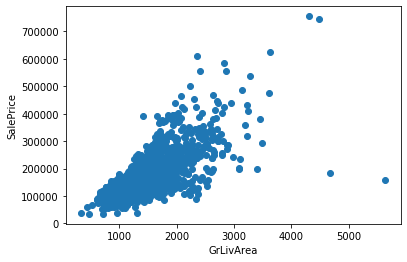

In [26]:
import seaborn as sns
plt.scatter(num['GrLivArea'], num['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
#This will help you identify if there is a linear relationship between these two variables.

Text(0, 0.5, 'Sale Price')

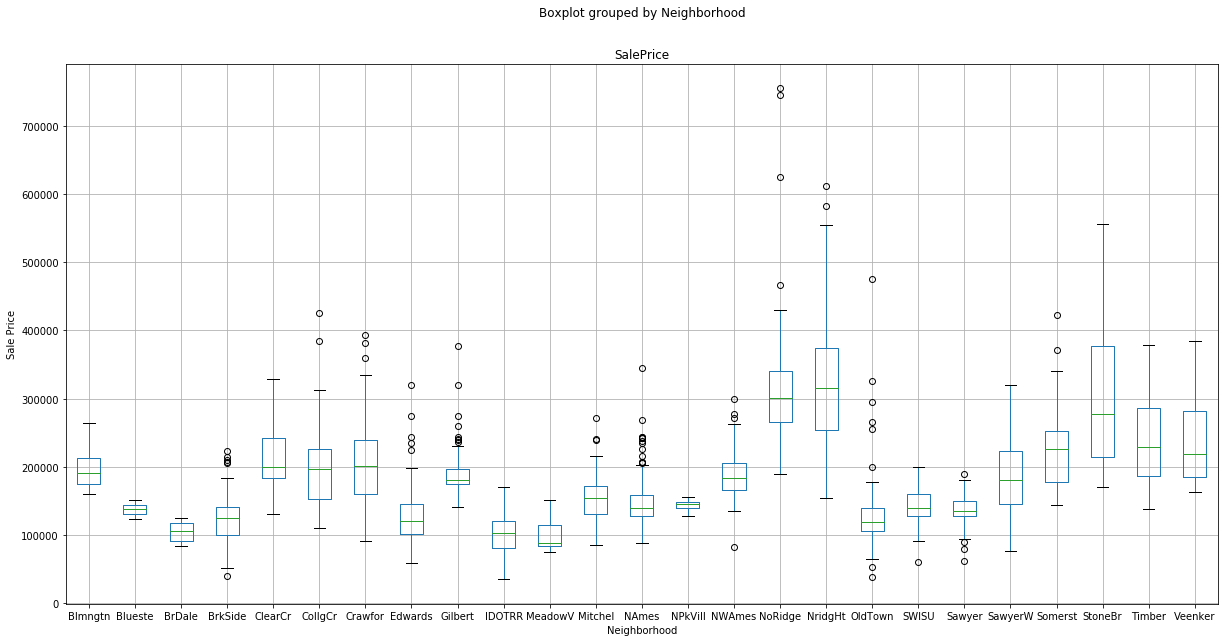

In [27]:
df.boxplot(column='SalePrice', by='Neighborhood', figsize=(20, 10))
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price') #This will help you identify if there are any significant differences in sale prices between neighborhoods.

Text(0, 0.5, 'Sale Price')

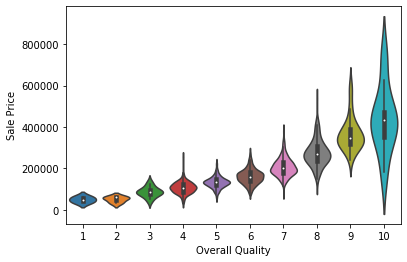

In [28]:
sns.violinplot(x='OverallQual', y='SalePrice', data=num, scale='width')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price') #shows density at given y value

In [29]:
final_df = num_cols.join(categ_cols)

In [30]:
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454    185000.0
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
Name: SalePrice, Length: 1459, dtype: float64

In [31]:
null_counts = final_df.isnull().sum()
print(null_counts[null_counts > 0])

Series([], dtype: int64)


In [32]:
final_df.isnull().sum().sum()

0

## Train_Test_split

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X = final_df.drop(['SalePrice'],axis=1)
y = final_df['SalePrice']

In [35]:
X.shape

(1459, 222)

In [36]:
final_df.shape

(1459, 223)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building For Train Data

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [39]:
rf = RandomForestRegressor(n_estimators=50,max_depth = 30,min_samples_split =35, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, min_samples_split=35, n_estimators=50,
                      random_state=42)

In [40]:
y_pred = rf.predict(X_train)

In [41]:
mse = mean_squared_error(y_train,y_pred)
mae = mean_absolute_error(y_train,y_pred)
r2 = r2_score(y_train,y_pred)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print("Mean Absolute error:", mae)
print("Mean squared error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute error: 15391.357406616236
Mean squared error: 654655262.934442
Root Mean Squared Error: 25586.231901834275
R-squared: 0.9003999506618782


In [42]:
rf.fit(X_test, y_test)

RandomForestRegressor(max_depth=30, min_samples_split=35, n_estimators=50,
                      random_state=42)

In [43]:
y_preds =rf.predict(X_test)

In [44]:
mae = mean_absolute_error(y_test, y_preds)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_preds)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 18382.486561998157
Mean Squared Error: 734627256.5817564
Root Mean Squared Error: 27104.008127613826
R-squared: 0.8603015991515532


## For TEST Data

In [45]:
df1 = pd.read_csv("HPtest.csv")

In [46]:
df1.shape

(1459, 80)

In [47]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [48]:
df1.isnull().sum().sum()

7000

In [49]:
null_counts = df1.isnull().sum()
print(null_counts[null_counts > 0])

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64


In [50]:
df1.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [51]:
df1 = df1.drop(['Id','Alley','PoolQC','MiscFeature','Fence','GarageFinish','GarageFinish','Utilities','Condition1','Condition2','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtUnfSF','KitchenQual','KitchenQual','YrSold','SaleType'],axis = 1) 

In [52]:
df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,Inside,Gtl,NAmes,...,Y,140,0,0,0,120,0,0,6,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,Corner,Gtl,NAmes,...,Y,393,36,0,0,0,0,12500,6,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,Inside,Gtl,Gilbert,...,Y,212,34,0,0,0,0,0,3,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,Inside,Gtl,Gilbert,...,Y,360,36,0,0,0,0,0,6,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,Inside,Gtl,StoneBr,...,Y,0,82,0,0,144,0,0,1,Normal


In [53]:
numer_cols=df1._get_numeric_data() 
numer_cols.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,1.0,730.0,140,0,0,0,120,0,0,6
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,1.0,312.0,393,36,0,0,0,0,12500,6
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,2.0,482.0,212,34,0,0,0,0,0,3
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,2.0,470.0,360,36,0,0,0,0,0,6
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,2.0,506.0,0,82,0,0,144,0,0,1


In [54]:
imputer = SimpleImputer(strategy='median')
test_impute = imputer.fit_transform(numer_cols)

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(test_impute)
scaled_data = scaler.transform(test_impute)

In [56]:
numeric_cols=pd.DataFrame(scaled_data,columns=numer_cols.columns)
numeric_cols.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold
0,-0.874711,0.567330,0.363929,-0.751101,0.400766,-0.340945,-1.072885,-0.563316,0.063428,0.517537,...,-0.988189,1.185921,0.366678,-0.701628,-0.360738,-0.088827,1.818960,-0.057227,-0.092244,-0.038281
1,-0.874711,0.615963,0.897861,-0.054877,0.400766,-0.439695,-1.214908,0.047057,1.063511,-0.297689,...,-0.988189,-0.741235,2.347867,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,19.730438,-0.038281
2,0.061351,0.275532,0.809646,-0.751101,-0.497418,0.844059,0.678742,-0.563316,0.773377,-0.297689,...,0.301406,0.042537,0.930495,-0.207871,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-1.140614
3,0.061351,0.470064,0.032064,-0.054877,0.400766,0.876976,0.678742,-0.450284,0.357958,-0.297689,...,0.301406,-0.012788,2.089451,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-0.038281
4,1.465443,-1.232092,-0.971808,1.337571,-0.497418,0.679475,0.394694,-0.563316,-0.387160,-0.297689,...,0.301406,0.153187,-0.729632,0.489198,-0.360738,-0.088827,2.243060,-0.057227,-0.092244,-1.875504


In [57]:
cat_cols=df1.drop(numer_cols,axis=1)
cat_cols=cat_cols.astype('category')
cat_cols.head()

,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,RoofStyle,...,HeatingQC,CentralAir,Electrical,Functional,FireplaceQu,GarageType,GarageQual,GarageCond,PavedDrive,SaleCondition
0,RH,Pave,Reg,Lvl,Inside,Gtl,NAmes,1Fam,1Story,Gable,...,TA,Y,SBrkr,Typ,NaN,Attchd,TA,TA,Y,Normal
1,RL,Pave,IR1,Lvl,Corner,Gtl,NAmes,1Fam,1Story,Hip,...,TA,Y,SBrkr,Typ,NaN,Attchd,TA,TA,Y,Normal
2,RL,Pave,IR1,Lvl,Inside,Gtl,Gilbert,1Fam,2Story,Gable,...,Gd,Y,SBrkr,Typ,TA,Attchd,TA,TA,Y,Normal
3,RL,Pave,IR1,Lvl,Inside,Gtl,Gilbert,1Fam,2Story,Gable,...,Ex,Y,SBrkr,Typ,Gd,Attchd,TA,TA,Y,Normal
4,RL,Pave,IR1,HLS,Inside,Gtl,StoneBr,TwnhsE,1Story,Gable,...,Ex,Y,SBrkr,Typ,NaN,Attchd,TA,TA,Y,Normal


In [58]:
imputer1 = SimpleImputer(strategy='most_frequent')
test_cat_impute = imputer1.fit_transform(cat_cols)

In [59]:
caterg_data=pd.DataFrame((test_cat_impute),columns=cat_cols.columns)
caterg_data.head()

,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,RoofStyle,...,HeatingQC,CentralAir,Electrical,Functional,FireplaceQu,GarageType,GarageQual,GarageCond,PavedDrive,SaleCondition
0,RH,Pave,Reg,Lvl,Inside,Gtl,NAmes,1Fam,1Story,Gable,...,TA,Y,SBrkr,Typ,Gd,Attchd,TA,TA,Y,Normal
1,RL,Pave,IR1,Lvl,Corner,Gtl,NAmes,1Fam,1Story,Hip,...,TA,Y,SBrkr,Typ,Gd,Attchd,TA,TA,Y,Normal
2,RL,Pave,IR1,Lvl,Inside,Gtl,Gilbert,1Fam,2Story,Gable,...,Gd,Y,SBrkr,Typ,TA,Attchd,TA,TA,Y,Normal
3,RL,Pave,IR1,Lvl,Inside,Gtl,Gilbert,1Fam,2Story,Gable,...,Ex,Y,SBrkr,Typ,Gd,Attchd,TA,TA,Y,Normal
4,RL,Pave,IR1,HLS,Inside,Gtl,StoneBr,TwnhsE,1Story,Gable,...,Ex,Y,SBrkr,Typ,Gd,Attchd,TA,TA,Y,Normal


In [60]:
from sklearn.preprocessing import OneHotEncoder
categorical_cols = [col for col in cat_cols.columns if caterg_data[col].dtype == 'object']
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
encod_cols = pd.DataFrame(ohe.fit_transform(caterg_data[categorical_cols]))
encod_cols.columns = ohe.get_feature_names(categorical_cols)
cate_cols = pd.concat([caterg_data.drop(categorical_cols, axis=1), encod_cols], axis=1)

In [61]:
cate_cols.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [62]:
test_df = numeric_cols.join(cate_cols)

In [63]:
test_df.shape

(1459, 210)

## Predicting For Test Data

In [64]:
rf = RandomForestRegressor(n_estimators=50,max_depth = 30,min_samples_split =2, random_state=42)
rf.fit(test_df,y)

RandomForestRegressor(max_depth=30, n_estimators=50, random_state=42)

In [65]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(rf, threshold=0.8)

In [66]:
y_predic =rf.predict(test_df)

In [67]:
mse = mean_squared_error(y, y_predic)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_predic)
print("MAE:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

MAE: 18382.486561998157
Mean Squared Error: 1005491391.6897312
Root Mean Squared Error: 31709.48425455279
R-squared: 0.8406598425711719


## Pseudo Code

Initialize an empty list to store the decision trees.

For i in range(n_estimators): 
         a. Draw a random sample of the input features. 
         b. Create a decision tree using the random sample of features with max_depth, 
              min_samples_split and min samples leaf. 
        c. Append the decision tree to the list of decision trees.


Initialize an empty array of size (n_samples, n_estimators) to store the predictions of each decision tree.

For i in range(n_estimators): 
         a. Use the i-th decision tree to predict the target variable y. 
         b. Store the predicted values in the i-th column of the array of predictions.

Compute the average of the predictions across all decision trees to obtain the final prediction.

Return the final prediction y_pred. 


## Kaggle link for dataset

https://www.kaggle.com/code/emrearslan123/house-price-prediction/data